# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [21]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [22]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [25]:
!ls -ltrh

total 352K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
-r--------  1 root root 339K Nov 17 22:29 N1037658939.root
drwx------  4 root root 4.0K Nov 17 23:07 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT

In [0]:
from scipy.integrate import quad
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

### 4. Lectura de datos y generación de histograma

In [0]:
!cp '/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1037658939.root' 'N1037658939.root'

In [0]:
from os import path
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
from ROOT import gROOT, gBenchmark

DataChain=ROOT.TChain('SystemTree')
DataChain.Add('N1037658939.root')

# Número de bins
nbins = 250

In [31]:
NumberOfEvents=DataChain.GetEntries()
print("Número total de eventos: ", NumberOfEvents)

Número total de eventos:  85000


In [32]:
MyHist = ROOT.TH1F( 'MyHist', 'Histograma de datos', nbins, 0, 1800 )

for entry in DataChain:
  MyHist.Fill(DataChain.x)

Warning in <TROOT::Append>: Replacing existing TH1: MyHist (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


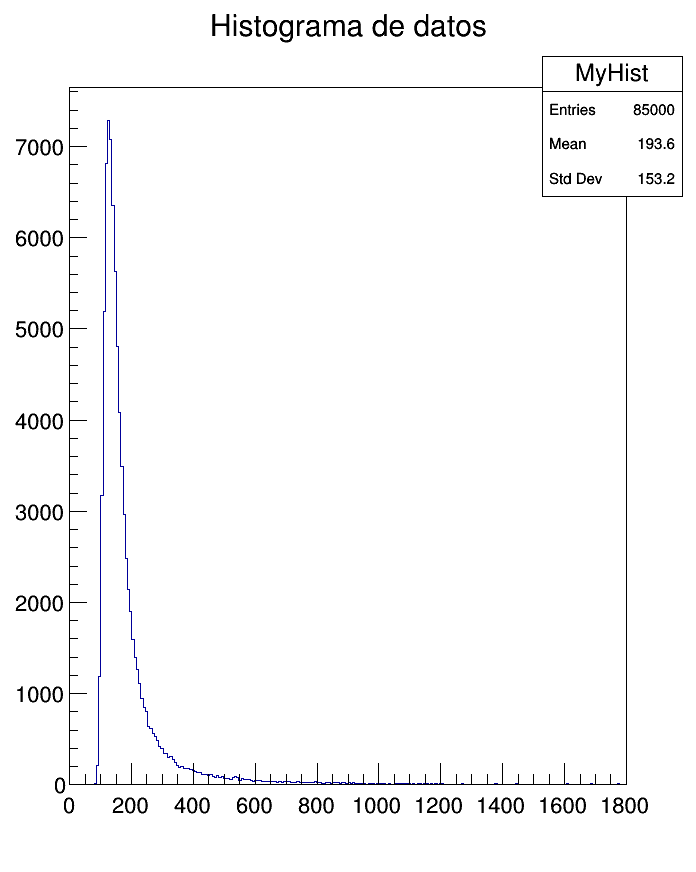

In [33]:
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
MyHist.Draw()
c1.Update()
gROOT.GetListOfCanvases().Draw()

### 5. Generación de datos con el algoritmo de Metrópolis

In [0]:
# Algoritmo de metrópolis
def metropolis(mu, c, N=NumberOfEvents, ext=1800):
  
  rnd.seed()
  phi0 = ext*rnd.random()
  prob_phi0 = ROOT.TMath.Landau(phi0, mu, c, True)
  
  # No se incluyen eventos con probabilidad nula
  while prob_phi0 == 0.0:
    phi0 = ext*rnd.random()
    prob_phi0 = ROOT.TMath.Landau(phi0, mu, c, True)

  phi = [phi0]
  while len(phi) < N:
    phip = ext*rnd.random()
    
    prob_phi0 = ROOT.TMath.Landau(phi[-1], mu, c, True)
    prob_phip = ROOT.TMath.Landau(phip, mu, c, True)

    # Solo se incluyen eventos con probabilidad positiva
    if prob_phip != 0.0:

      deltaS = -np.log(prob_phip/prob_phi0)

      if deltaS < 0:
        phi.append(phip)

      else:
        x = rnd.random()
        if x < prob_phip/prob_phi0:
          phi.append(phip)
      
    else:
      pass
  
  return phi

# Parámetros
mu = 250
c = 7

# Generación de datos
phi = metropolis(mu, c)

In [35]:
MetHist = ROOT.TH1F( 'MetHist', 'Histograma de datos generados con metropolis', nbins, 0, 1800 )

for entry in phi:
  MetHist.Fill(entry)

Warning in <TROOT::Append>: Replacing existing TH1: MetHist (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


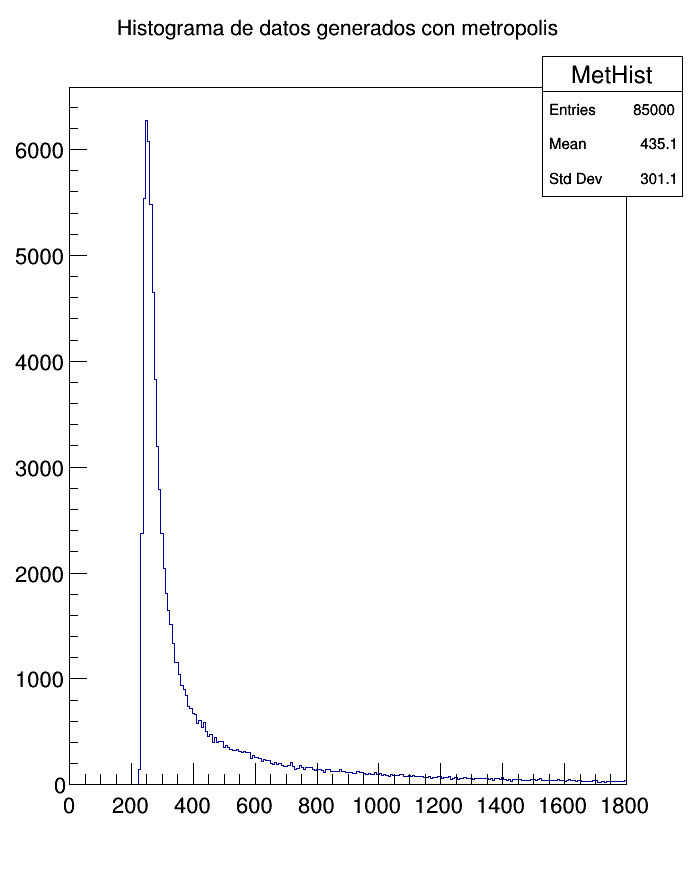

In [36]:
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
MetHist.Draw()
c1.Update()
gROOT.GetListOfCanvases().Draw()

### 6. Ajuste y cálculo de $\chi ^2/ndf$.

In [37]:
# Arreglos para mu y c
# Se busca en el rango [100, 170] para mu y [1, 6] para c
mu = np.arange(100, 180, 10)
c = np.arange(1, 7)

chi2_plot = []

# Se asigna variable para almacenar chi^2 mínimo
chi2_min = 1e9

for m in mu:
  
  chi2_list = []
  for w in c:

    phi = metropolis(m, w)
    GenHist = ROOT.TH1F( 'GenHist', 'GenHist', nbins, 0, 1800 )
    
    for x in phi:
      GenHist.Fill(x)

    # Calculo de chi^2
    chi = 0
    for i in range(1, MyHist.GetNbinsX()):
      exp = GenHist.GetBinContent(i)
      obs = MyHist.GetBinContent(i)

      # Se ignoran bins vacíos en el histograma de datos originales
      if obs == 0:
        pass
      
      else:
        chi += (obs-exp)**2/obs

    chi2 = chi/nbins
    chi2_list.append(chi2)

    # Se busca chi^2/ndf mínimo y se guardan los mu y c para los que se consigue
    if chi2_min > chi2:
      chi2_min = chi2

      print('chi2_min = ', chi2_min)

      best_mu = m
      best_c = w

  chi2_plot.append(chi2_list)

print('')
print('Mejor valor de mu: ', best_mu)
print('Mejor valor de c: ', best_c)

chi2_min =  1102.457160596109
chi2_min =  853.1810137430361
chi2_min =  675.1062790866723
chi2_min =  668.9061138053117
chi2_min =  572.8985613619172
chi2_min =  320.09876598729386
chi2_min =  282.2738923669854
chi2_min =  272.62751004422194
chi2_min =  229.56216602257084
chi2_min =  229.4025887182741

Mejor valor de mu:  120
Mejor valor de c:  4


Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: GenHist (Pote

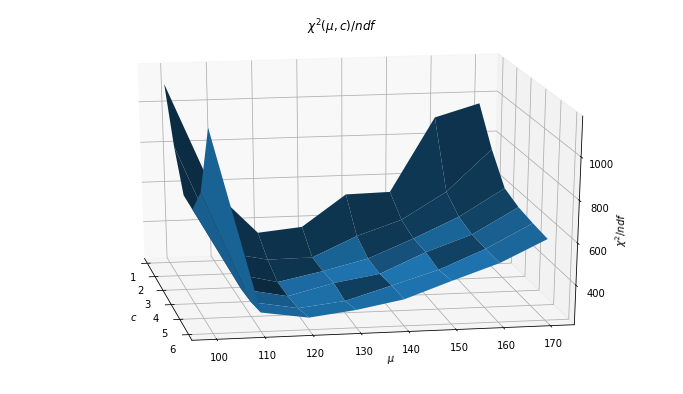

In [38]:
from mpl_toolkits import mplot3d

# Gráfica de chi^2/ndf
plt.figure(figsize=(12, 7))

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(c, mu)
chiplot = np.array(chi2_plot)

ax.plot_surface(X, Y, chiplot)
ax.set_xlabel(r'$c$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'$\chi ^2 / ndf$')
ax.set_title(r'$\chi ^2 (\mu, c)/ndf$')

ax.view_init(elev = 20, azim=-10)

In [0]:
# Generación de datos del mejor ajuste
best = metropolis(best_mu, best_c)

FitHist = ROOT.TH1F( 'FitHist', 'Histograma de datos con mejor ajuste', nbins, 0, 1800 )

for entry in best:
  FitHist.Fill(entry)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


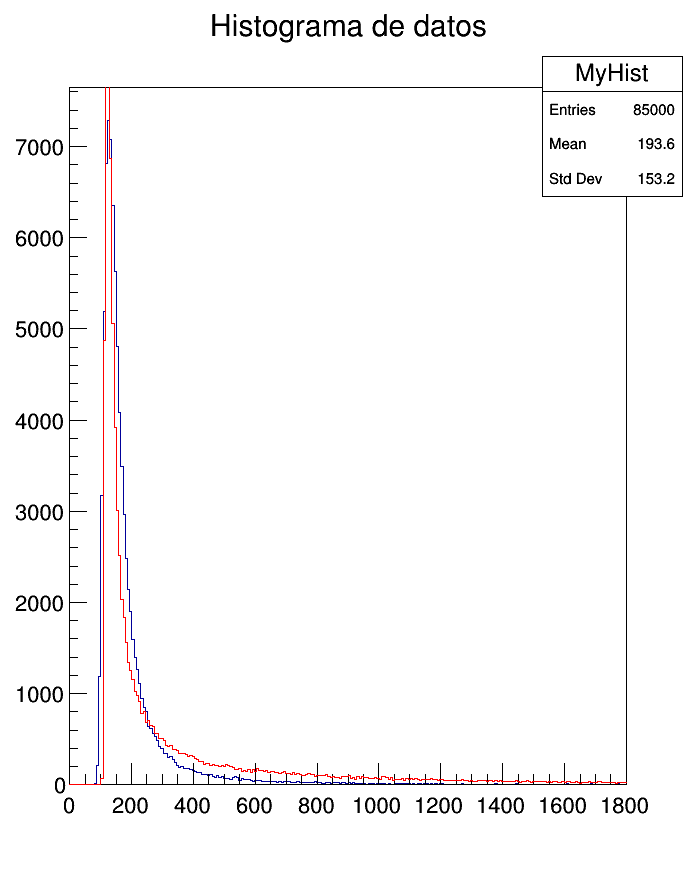

In [42]:
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
MyHist.Draw()
FitHist.Draw("same")
FitHist.SetLineColor(2)
c1.Update()
gROOT.GetListOfCanvases().Draw()